In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.tree import _tree
from statistics import mean
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer


In [7]:
print(os.listdir("../archive (1)"))

# Be careful with path Directory.
#reading dataset

dataset=pd.read_csv('../archive (1)/city_day.csv')
dataset.describe()
dataset.info()

['## importing packages.py', 'city_day.csv', 'city_hour.csv', 'Dataset', 'Final', 'FUZZY', 'GA', 'GA.ipynb', 'GA1.ipynb', 'RuleSet_Creation.ipynb', 'stations.csv', 'station_day.csv', 'station_hour.csv', 't2.arff', 'test1.csv', 'test1.py', 'test2.csv', 'test2.py', 'test3.py', 'test4.py', 'test5f.py', 'test6f.py', 'test7GA.py', 'Test8.py']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     2

In [8]:
dataset.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [9]:
#pleanty of NaN data is present preprocessing 

dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
kk = dataset
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(dataset.iloc[:,2:14].values)
dataset.iloc[:,2:14] = imputer.transform(dataset.iloc[:,2:14].values)

dataset.info()
kk = dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  Xylene      29531 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [20]:
print("Emmision wise Polluted Top City")

Emmision wise Polluted Top City


<AxesSubplot:xlabel='City', ylabel='Count'>

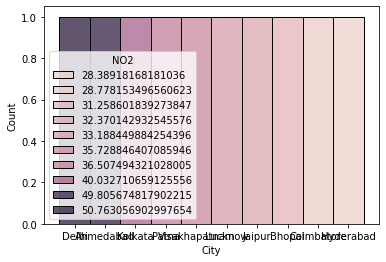

In [19]:
st_polution = dataset.groupby('City').mean()[['SO2', 'NO2', 'NO', 'PM10', 'PM2.5']]
High_NO2_State_Category=st_polution.sort_values(by='NO2',ascending=False).head(10)
High_NO2_State_Category_sorted=High_NO2_State_Category.loc[:,['NO2']]
High_NO2_State_Category_sorted.head()
sns.histplot(data=High_NO2_State_Category_sorted,x="City", hue="NO2",multiple="stack")


<AxesSubplot:xlabel='City', ylabel='Count'>

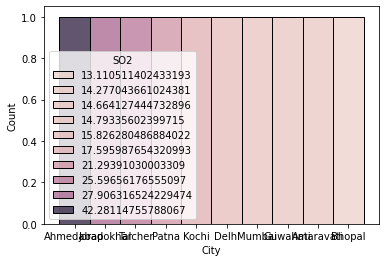

In [17]:
st_polution = dataset.groupby('City').mean()[['SO2', 'NO2', 'NO', 'PM10', 'PM2.5']]
High_SO2_State_Category=st_polution.sort_values(by='SO2',ascending=False).head(10)
High_SO2_State_Category_sorted=High_SO2_State_Category.loc[:,['SO2']]
High_SO2_State_Category_sorted.head()
sns.histplot(data=High_SO2_State_Category_sorted,x="City", hue="SO2",multiple="stack")

<AxesSubplot:xlabel='City', ylabel='Count'>

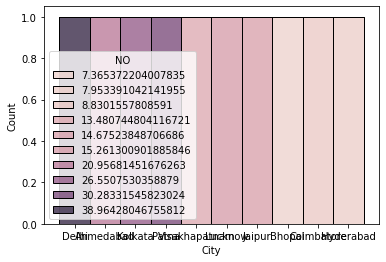

In [15]:
st_polution = dataset.groupby('City').mean()[['SO2', 'NO2', 'NO', 'PM10', 'PM2.5']]
High_NO_State_Category=st_polution.sort_values(by='NO',ascending=False).head(10)
High_NO_State_Category_sorted=High_NO2_State_Category.loc[:,['NO']]
High_NO_State_Category_sorted.head()
sns.histplot(data=High_NO_State_Category_sorted,x="City", hue="NO",multiple="stack")


 

<AxesSubplot:xlabel='City', ylabel='Count'>

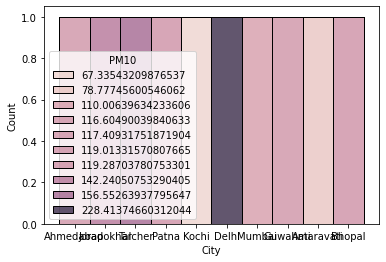

In [87]:
st_polution = dataset.groupby('City').mean()[['SO2', 'NO2', 'NO', 'PM10', 'PM2.5']]
High_PM10_State_Category=st_polution.sort_values(by='PM10',ascending=False).head(10)
High_PM10_State_Category_sorted=High_NO2_State_Category.loc[:,['PM10']]
High_PM10_State_Category_sorted.head()
sns.histplot(data=High_PM10_State_Category_sorted,x="City", hue="PM10",multiple="stack")


<ipython-input-84-03719e5be30b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Patna['Year'] = pd.DatetimeIndex(Patna['Date']).year
<ipython-input-84-03719e5be30b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Patna['Month'] = pd.DatetimeIndex(Patna['Date']).month
----------------------------------------------
Patna TRENDS FOR PAST 5 YEARS


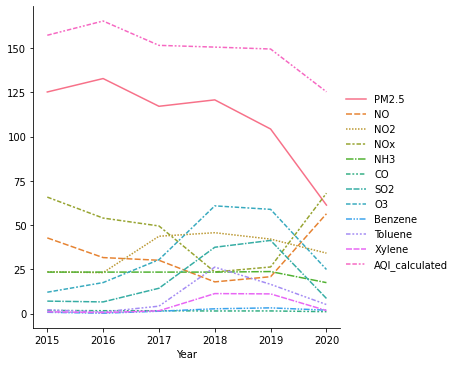

In [84]:
Patna = kk[kk['City'] == 'Patna']
Patna['Year'] = pd.DatetimeIndex(Patna['Date']).year
Patna['Month'] = pd.DatetimeIndex(Patna['Date']).month
sns.relplot(data=Patna.groupby('Year').mean().drop(['AQI',"Checks",'Month','PM10'],axis=1),kind="line")


print("----------------------------------------------")
print("Patna TRENDS FOR PAST 5 YEARS")

<ipython-input-83-fa510ee73282>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Talcher['Year'] = pd.DatetimeIndex(Talcher['Date']).year
<ipython-input-83-fa510ee73282>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Talcher['Month'] = pd.DatetimeIndex(Talcher['Date']).month
----------------------------------------------
Talcher TRENDS FOR PAST 5 YEARS


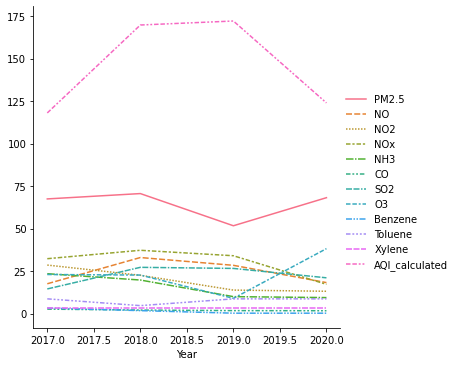

In [83]:
Talcher = kk[kk['City'] == 'Talcher']
Talcher['Year'] = pd.DatetimeIndex(Talcher['Date']).year
Talcher['Month'] = pd.DatetimeIndex(Talcher['Date']).month
sns.relplot(data=Talcher.groupby('Year').mean().drop(['AQI',"Checks",'Month','PM10'],axis=1),kind="line")
print("----------------------------------------------")
print("Talcher TRENDS FOR PAST 5 YEARS")

<ipython-input-82-9e0e73e3ac64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ahmedabad['Year'] = pd.DatetimeIndex(Ahmedabad['Date']).year
<ipython-input-82-9e0e73e3ac64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ahmedabad['Month'] = pd.DatetimeIndex(Ahmedabad['Date']).month
----------------------------------------------
Ahmedabad TRENDS FOR PAST 5 YEARS


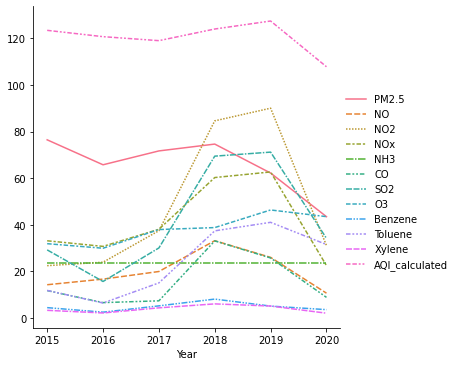

In [82]:
Ahmedabad = kk[kk['City'] == 'Ahmedabad']
Ahmedabad['Year'] = pd.DatetimeIndex(Ahmedabad['Date']).year
Ahmedabad['Month'] = pd.DatetimeIndex(Ahmedabad['Date']).month
sns.relplot(data=Ahmedabad.groupby('Year').mean().drop(['AQI',"Checks",'Month','PM10'],axis=1),kind="line")
print("----------------------------------------------")
print("Ahmedabad TRENDS FOR PAST 5 YEARS")

<ipython-input-81-f110cb37683f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chennai['Year'] = pd.DatetimeIndex(chennai['Date']).year
<ipython-input-81-f110cb37683f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chennai['Month'] = pd.DatetimeIndex(chennai['Date']).month
----------------------------------------------
CHENNAI TRENDS FOR PAST 5 YEARS


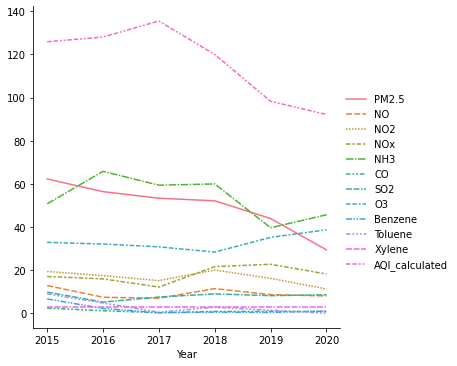

In [81]:
chennai = kk[kk['City'] == 'Chennai']
chennai['Year'] = pd.DatetimeIndex(chennai['Date']).year
chennai['Month'] = pd.DatetimeIndex(chennai['Date']).month
sns.relplot(data=chennai.groupby('Year').mean().drop(['AQI',"Checks",'Month','PM10'],axis=1),kind="line")
print("----------------------------------------------")
print("CHENNAI TRENDS FOR PAST 5 YEARS")

In [22]:
def AIR_QUALITY_INDEX(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return "Unknown"
dataset["Checks"] = (dataset["PM2.5"] > 0).astype(int) + \
                (dataset["PM10"] > 0).astype(int) + \
                (dataset["SO2"] > 0).astype(int) + \
                (dataset["NOx"] > 0).astype(int) + \
                (dataset["NH3"] > 0).astype(int) + \
                (dataset["CO"] > 0).astype(int) + \
                (dataset["O3"] > 0).astype(int)

dataset["AQI_calculated"] = round(dataset[["PM2.5", "PM10", "SO2", "NOx",
                                 "NH3", "CO", "O3"]].max(axis = 1))
dataset.loc[dataset["PM2.5"] + dataset["PM10"] <= 0, "AQI_calculated"] = np.NaN
dataset.loc[dataset.Checks < 3, "AQI_calculated"] = np.NaN

dataset["AQI_bucket_calculated"] = dataset["AQI_calculated"].apply(lambda x: AIR_QUALITY_INDEX(x))
dataset[~dataset.AQI_calculated.isna()].head(13)
dataset[~dataset.AQI_calculated.isna()].AQI_bucket_calculated.value_counts()



Moderate        16618
Satisfactory     6435
Good             3169
Poor             2151
Very Poor         766
Severe            392
Name: AQI_bucket_calculated, dtype: int64

In [23]:
#train dataset 
X = dataset.iloc[:,2:11]
x_t = dataset.iloc[5906:,2:11]
y = dataset.loc[:,'AQI_bucket_calculated']
y_t = dataset.loc[5906:,'AQI_bucket_calculated']

In [24]:
# Fit the classifier with max_depth=5  because it is give 99% accuracy.
clf = DecisionTreeClassifier()
model = clf.fit(X, y)

In [25]:
tt = cross_val_score(clf, X, y, cv=20)
print("Average Score from cross_val_score = ",mean(tt))


Average Score from cross_val_score =  0.9955980637159113


In [26]:
#plain feature representation
text_representation = tree.export_text(clf)
print("Ruleset without discretization")
print(text_representation)


Ruleset without discretization
|--- feature_1 <= 100.51
|   |--- feature_1 <= 50.50
|   |   |--- feature_0 <= 47.09
|   |   |   |--- feature_8 <= 50.45
|   |   |   |   |--- feature_4 <= 50.51
|   |   |   |   |   |--- feature_5 <= 50.42
|   |   |   |   |   |   |--- feature_7 <= 50.43
|   |   |   |   |   |   |   |--- class: Good
|   |   |   |   |   |   |--- feature_7 >  50.43
|   |   |   |   |   |   |   |--- feature_7 <= 87.83
|   |   |   |   |   |   |   |   |--- class: Satisfactory
|   |   |   |   |   |   |   |--- feature_7 >  87.83
|   |   |   |   |   |   |   |   |--- class: Moderate
|   |   |   |   |   |--- feature_5 >  50.42
|   |   |   |   |   |   |--- feature_5 <= 100.03
|   |   |   |   |   |   |   |--- class: Satisfactory
|   |   |   |   |   |   |--- feature_5 >  100.03
|   |   |   |   |   |   |   |--- class: Moderate
|   |   |   |   |--- feature_4 >  50.51
|   |   |   |   |   |--- feature_4 <= 97.40
|   |   |   |   |   |   |--- feature_3 <= 0.54
|   |   |   |   |   |   |   |--- c

In [28]:
# detailed ruleset with feature names
#text_representation = tree.export_text(clf, feature_names=["PM2.5","PM10","NO","NO2",'NOx',"NH3","CO","SO2","O3","Benzene","Toluene","Xylene"])

print("Ruleset without discretization with feature name")
text_representation = tree.export_text(clf, feature_names=["PM2.5","PM10","NO","NO2",'NOx',"NH3","CO","SO2","O3"])
print(text_representation)

Ruleset without discretization with feature name
|--- PM10 <= 100.51
|   |--- PM10 <= 50.50
|   |   |--- PM2.5 <= 47.09
|   |   |   |--- O3 <= 50.45
|   |   |   |   |--- NOx <= 50.51
|   |   |   |   |   |--- NH3 <= 50.42
|   |   |   |   |   |   |--- SO2 <= 50.43
|   |   |   |   |   |   |   |--- class: Good
|   |   |   |   |   |   |--- SO2 >  50.43
|   |   |   |   |   |   |   |--- SO2 <= 87.83
|   |   |   |   |   |   |   |   |--- class: Satisfactory
|   |   |   |   |   |   |   |--- SO2 >  87.83
|   |   |   |   |   |   |   |   |--- class: Moderate
|   |   |   |   |   |--- NH3 >  50.42
|   |   |   |   |   |   |--- NH3 <= 100.03
|   |   |   |   |   |   |   |--- class: Satisfactory
|   |   |   |   |   |   |--- NH3 >  100.03
|   |   |   |   |   |   |   |--- class: Moderate
|   |   |   |   |--- NOx >  50.51
|   |   |   |   |   |--- NOx <= 97.40
|   |   |   |   |   |   |--- NO2 <= 0.54
|   |   |   |   |   |   |   |--- class: Moderate
|   |   |   |   |   |   |--- NO2 >  0.54
|   |   |   |   |  

In [29]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules
rules = get_rules(clf, ["PM2.5","PM10","NO","NO2",'NOx',"NH3","CO","SO2","O3"], ["Good","Satisfactory","Moderate","Poor","Very Poor"," Severe"])

In [26]:
print("NON-DISCRETIZED")
for r in rules:
    print(r)



NON-DISCRETIZED
if (PM10 > 9.5) and (PM10 <= 19.5) and (PM2.5 <= 20.5) and (NH3 <= 56.5) and (NOx <= 42.5) and (PM10 > 10.5) then class: Satisfactory (proba: 100.0%) | based on 15,372 samples
if (PM10 <= 9.5) and (PM10 > 4.5) and (NOx <= 20.5) and (SO2 <= 51.5) and (PM2.5 <= 9.5) and (O3 <= 38.5) and (NH3 <= 28.5) and (PM10 > 5.5) then class: Poor (proba: 100.0%) | based on 4,537 samples
if (PM10 <= 9.5) and (PM10 <= 4.5) and (PM2.5 <= 4.5) and (O3 <= 18.5) and (NOx <= 10.5) and (NH3 <= 14.5) and (SO2 <= 25.5) and (NH3 <= 13.5) and (NOx <= 9.5) then class: Good (proba: 100.0%) | based on 3,077 samples
if (PM10 > 9.5) and (PM10 > 19.5) and (PM10 <= 29.5) and (PM2.5 <= 32.0) and (PM10 > 20.5) then class: Moderate (proba: 100.0%) | based on 1,328 samples
if (PM10 > 9.5) and (PM10 > 19.5) and (PM10 > 29.5) and (PM10 <= 39.5) and (PM2.5 <= 40.5) and (PM10 > 30.5) then class:  Severe (proba: 100.0%) | based on 562 samples
if (PM10 > 9.5) and (PM10 <= 19.5) and (PM2.5 > 20.5) and (PM2.5 <= 31

In [31]:
print("Total number of rules generated using depth level = 5 is ",len(rules))

Total number of rules generated using depth level = 5 is  49


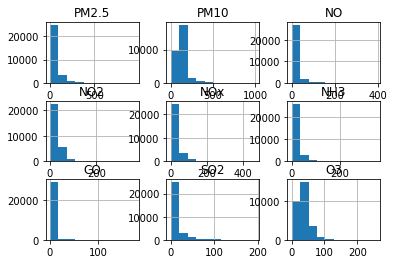

In [36]:
#Actual data visualization
X.hist()
plt.show()

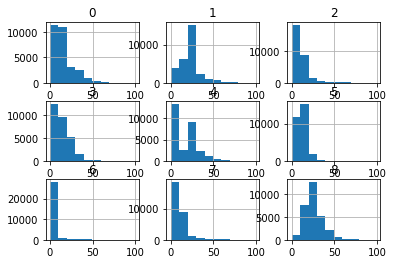

In [38]:
#Discretized data visualization
data = X
from sklearn.preprocessing import KBinsDiscretizer
from pandas import DataFrame
trans = KBinsDiscretizer(n_bins=100, encode='ordinal', strategy='kmeans')
data = trans.fit_transform(data)
data = DataFrame(data)
data.hist()
plt.show()
temp = data



In [39]:
clff = DecisionTreeClassifier()
model = clff.fit(data, y)
text_representation = tree.export_text(clff)
print("Ruleset from Discritized dataset")
print(text_representation)

Ruleset from Discritized dataset
|--- feature_1 <= 18.50
|   |--- feature_1 <= 9.50
|   |   |--- feature_0 <= 10.50
|   |   |   |--- feature_8 <= 35.50
|   |   |   |   |--- feature_4 <= 30.50
|   |   |   |   |   |--- feature_5 <= 22.50
|   |   |   |   |   |   |--- feature_1 <= 8.50
|   |   |   |   |   |   |   |--- feature_7 <= 29.00
|   |   |   |   |   |   |   |   |--- feature_4 <= 29.50
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 34.50
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= 21.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Good
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  21.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_8 >  34.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 10.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  10.50
|   |   |   |   | 

In [40]:
rules = get_rules(clff, ["PM2.5","PM10","NO","NO2",'NOx',"NH3","CO","SO2","O3"], ["Good","Satisfactory","Moderate","Poor","Very Poor"," Severe"])
print("NON-DISCRETIZED")
for i in rules:
    print(i)

NON-DISCRETIZED
if (PM10 > 18.5) and (PM10 <= 35.5) and (PM2.5 <= 42.5) and (NH3 <= 71.5) and (NOx <= 77.5) and (PM2.5 <= 41.5) then class: Satisfactory (proba: 100.0%) | based on 16,342 samples
if (PM10 <= 18.5) and (PM10 > 9.5) and (NOx <= 47.5) and (SO2 <= 54.5) and (PM2.5 <= 28.5) and (O3 <= 58.5) and (NH3 <= 40.5) and (NOx <= 46.5) and (PM10 <= 17.5) then class: Poor (proba: 100.0%) | based on 5,082 samples
if (PM10 <= 18.5) and (PM10 <= 9.5) and (PM2.5 <= 10.5) and (O3 <= 35.5) and (NOx <= 30.5) and (NH3 <= 22.5) and (PM10 <= 8.5) and (SO2 <= 29.0) and (NOx <= 29.5) and (O3 <= 34.5) and (NH3 <= 21.5) then class: Good (proba: 100.0%) | based on 2,660 samples
if (PM10 > 18.5) and (PM10 > 35.5) and (PM10 <= 48.5) and (PM10 > 36.5) and (PM2.5 <= 55.0) then class: Moderate (proba: 100.0%) | based on 1,393 samples
if (PM10 > 18.5) and (PM10 > 35.5) and (PM10 > 48.5) and (PM10 <= 58.5) and (PM2.5 <= 64.0) and (PM10 > 49.5) then class:  Severe (proba: 100.0%) | based on 567 samples
if (P

In [41]:
#comparison between non-desicretized built tree and discretized built tree 

#accuracy is close to after setting n_bins to 100 in discretization stratergy.
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
print("Discretize")
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)
ttt = cross_val_score(clff, data, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print("Average Score from cross_val_score = ",mean(ttt))
print('Accuracy: %.3f (%.3f)' % (mean(ttt), std(ttt)))




Discretize
Average Score from cross_val_score =  0.9865790892449662
Accuracy: 0.987 (0.003)


In [42]:
tt = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print("Non-Discretize")
print("Average Score using cross_val_score = ",mean(tt))
print('Accuracy: %.3f (%.3f)' % (mean(tt), std(tt)))

Non-Discretize
Average Score using cross_val_score =  0.9985664944383589
Accuracy: 0.999 (0.001)


In [43]:
#discretized values tree 

text_representation = tree.export_text(clff, feature_names=["PM2.5","PM10","NO","NO2",'NOx',"NH3","CO","SO2","O3"])
print(text_representation)

|--- PM10 <= 18.50
|   |--- PM10 <= 9.50
|   |   |--- PM2.5 <= 10.50
|   |   |   |--- O3 <= 35.50
|   |   |   |   |--- NOx <= 30.50
|   |   |   |   |   |--- NH3 <= 22.50
|   |   |   |   |   |   |--- PM10 <= 8.50
|   |   |   |   |   |   |   |--- SO2 <= 29.00
|   |   |   |   |   |   |   |   |--- NOx <= 29.50
|   |   |   |   |   |   |   |   |   |--- O3 <= 34.50
|   |   |   |   |   |   |   |   |   |   |--- NH3 <= 21.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Good
|   |   |   |   |   |   |   |   |   |   |--- NH3 >  21.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- O3 >  34.50
|   |   |   |   |   |   |   |   |   |   |--- NOx <= 10.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- NOx >  10.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Satisfactory
|   |   |   |   |   |   |   |   |--- NOx >  29.50
|   |   |   |   |   

In [44]:
#non discretized ruleset tree
text_representation = tree.export_text(clf, feature_names=["PM2.5","PM10","NO","NO2",'NOx',"NH3","CO","SO2","O3"])
print(text_representation)

|--- PM10 <= 100.51
|   |--- PM10 <= 50.50
|   |   |--- PM2.5 <= 47.09
|   |   |   |--- O3 <= 50.45
|   |   |   |   |--- NOx <= 50.51
|   |   |   |   |   |--- NH3 <= 50.42
|   |   |   |   |   |   |--- SO2 <= 50.43
|   |   |   |   |   |   |   |--- class: Good
|   |   |   |   |   |   |--- SO2 >  50.43
|   |   |   |   |   |   |   |--- SO2 <= 87.83
|   |   |   |   |   |   |   |   |--- class: Satisfactory
|   |   |   |   |   |   |   |--- SO2 >  87.83
|   |   |   |   |   |   |   |   |--- class: Moderate
|   |   |   |   |   |--- NH3 >  50.42
|   |   |   |   |   |   |--- NH3 <= 100.03
|   |   |   |   |   |   |   |--- class: Satisfactory
|   |   |   |   |   |   |--- NH3 >  100.03
|   |   |   |   |   |   |   |--- class: Moderate
|   |   |   |   |--- NOx >  50.51
|   |   |   |   |   |--- NOx <= 97.40
|   |   |   |   |   |   |--- NO2 <= 0.54
|   |   |   |   |   |   |   |--- class: Moderate
|   |   |   |   |   |   |--- NO2 >  0.54
|   |   |   |   |   |   |   |--- SO2 <= 95.06
|   |   |   |   |   | 

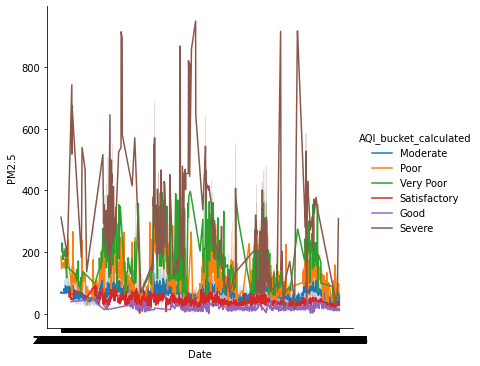

In [54]:
dots = kk

sns.relplot(
    data=dots, kind="line",
    x="Date", y="PM2.5", hue="AQI_bucket_calculated"

)